In [337]:
import numpy as np 
import matplotlib.pyplot as plt

import pandas as pd

from scipy.stats import norm

In [338]:
dados = []

In [339]:
dados = np.array([892])

In [340]:
normal_distribution = lambda x, mi, si: 1/np.sqrt(2*np.pi*si**2)*np.exp(-1/2*((x - mi)/si)**2)

In [341]:
guess_A = (900, 20)
guess_B = (900, 80)

In [342]:
x = np.linspace(guess_B[0] - guess_B[1]*4, guess_B[0] + guess_B[1]*4, 1000)

priori_A = normal_distribution(x, guess_A[0], guess_A[1])
priori_B = normal_distribution(x, guess_B[0], guess_B[1])

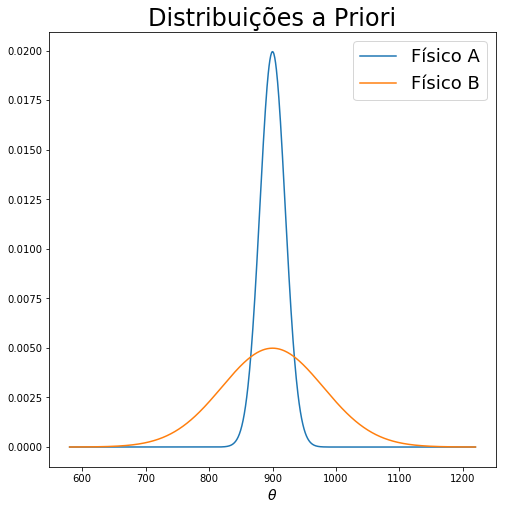

In [343]:
fig = plt.figure(figsize = (8,8))

plt.title('Distribuições a Priori', fontsize = 24)

plt.plot(x, priori_A, label = 'Físico A')
plt.plot(x, priori_B, label = 'Físico B')

plt.xlabel(r'$\theta$', fontsize = 14)

plt.legend(fontsize = 18)

plt.savefig(f"atv_II_1", dpi=150)

In [344]:
n = dados.shape[0]
sig = 40

In [346]:
var_posteriori = lambda var_priori, var_sample, n: 1/(n/var_sample + 1/var_priori)
mean_posteriori = lambda mean_priori, var_priori, mean_sample, var_sample, n: var_posteriori(var_priori, var_sample, n)*(n*mean_sample/var_sample + mean_priori/var_priori)

In [347]:
T = lambda sig_0, sig_1: 1/(sig_0**(-2) + sig_1**(-2))
mu = lambda y, mu_1, sig_0, sig_1: (y/(sig_0**2) - mu_1/(sig_1**(-2)))/T(sig_0, sig_1)

In [350]:
var_pos_A1 = var_posteriori(guess_A[1]**2, sig**2, n)
var_pos_B1 = var_posteriori(guess_B[1]**2, sig**2, n)

mean_pos_A1 = mean_posteriori(guess_A[0], guess_A[1]**2, dados.mean(), sig**2, n)
mean_pos_B1 = mean_posteriori(guess_B[0], guess_B[1]**2, dados.mean(), sig**2, n)

T_A1 = T(sig, var_pos_A1)

In [351]:
T_A1

1575.3846153846152

In [349]:
print(f'Posteriori distribution for the experimento X = [892], take by the Physicist A, is N({mean_pos_A1:.2f}, {var_pos_A1:.2f})')
print(f'Posteriori distribution for the experimento X = [892], take by the Physicist B, is N({mean_pos_B1:.2f}, {var_pos_B1:.2f})')

Posteriori distribution for the experimento X = [892], take by the Physicist A, is N(898.40, 320.00)
Posteriori distribution for the experimento X = [892], take by the Physicist B, is N(893.60, 1280.00)


In [306]:
xl = np.linspace(guess_B[0] - guess_B[1]*3, guess_B[0] + guess_B[1]*3, 1000)

In [307]:
curve_priori_A1 = normal_distribution(xl, guess_A[0], guess_A[1])
curve_priori_B1 = normal_distribution(xl, guess_B[0], guess_B[1])

curve_posteriori_A1 = normal_distribution(xl, mean_pos_A1, np.sqrt(var_pos_A1))
curve_posteriori_B1 = normal_distribution(xl, mean_pos_B1, np.sqrt(var_pos_B1))

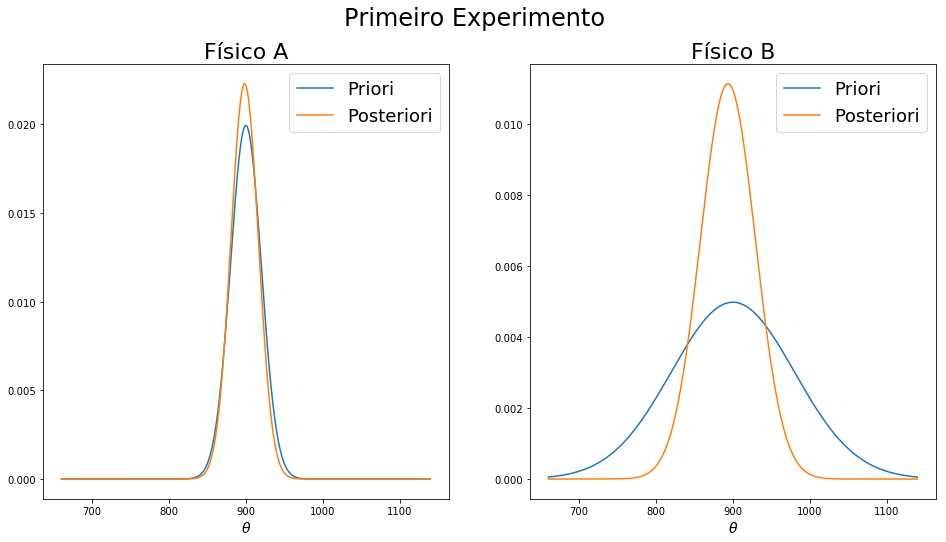

In [308]:
fig, axis = plt.subplots(1, 2, figsize = (20*0.8,10*0.8))

axis[0].set_title('Físico A', fontsize = 22)

axis[0].plot(xl, curve_priori_A1, label = 'Priori')
axis[0].plot(xl, curve_posteriori_A1, label = 'Posteriori')

axis[0].set_xlabel(r'$\theta$', fontsize = 14)

axis[1].set_title('Físico B', fontsize = 22)

axis[1].plot(xl, curve_priori_B1, label = 'Priori')
axis[1].plot(xl, curve_posteriori_B1, label = 'Posteriori')

axis[1].set_xlabel(r'$\theta$', fontsize = 14)

axis[0].legend(fontsize = 18)
axis[1].legend(fontsize = 18)

fig.suptitle(r'Primeiro Experimento', fontsize = 24)

plt.savefig(f"atv_II_2", dpi=150)

In [309]:
def normal_resume(mean, var):
    
    prior_credible_interval = mean+np.sqrt(var)*norm.ppf([0.025])*[1, -1]
    
    print(f'-Mean: {mean:.2f}\n-Mode: {mean:.2f}\n-Median: {mean:.2f}\n-Variance: {var:.2f}\n-Credible Interval: [{prior_credible_interval[0]:.2f}, {prior_credible_interval[1]:.2f}]')

In [310]:
print('Physicit A\nPrior Resume:\n')
normal_resume(guess_A[0], guess_A[1]**2)

Physicit A
Prior Resume:

-Mean: 900.00
-Mode: 900.00
-Median: 900.00
-Variance: 400.00
-Credible Interval: [860.80, 939.20]


In [311]:
print('Physicit B\nPrior Resume:\n')

normal_resume(guess_B[0], guess_B[1]**2)

Physicit B
Prior Resume:

-Mean: 900.00
-Mode: 900.00
-Median: 900.00
-Variance: 6400.00
-Credible Interval: [743.20, 1056.80]


In [312]:
print('Physicit A Experiment 1\nPosterior Resume:\n')
normal_resume(mean_pos_A1, var_pos_A1)

Physicit A Experiment 1
Posterior Resume:

-Mean: 898.40
-Mode: 898.40
-Median: 898.40
-Variance: 320.00
-Credible Interval: [863.34, 933.46]


In [313]:
print('Physicit B Experiment 1\nPosterior Resume:\n')

normal_resume(mean_pos_B1, var_pos_B1)

Physicit B Experiment 1
Posterior Resume:

-Mean: 893.60
-Mode: 893.60
-Median: 893.60
-Variance: 1280.00
-Credible Interval: [823.48, 963.72]


In [314]:
with open('dados.txt', 'r') as file:
    
    lines = [line.replace('\n', '').split(' ') for line in file.readlines()]
    dados = np.array(lines, dtype = float).flatten()

In [315]:
n = dados.shape[0]

In [316]:
var_pos_A2 = var_posteriori(guess_A[1]**2, sig**2, n)
var_pos_B2 = var_posteriori(guess_B[1]**2, sig**2, n)

mean_pos_A2 = mean_posteriori(guess_A[0], guess_A[1]**2, dados.mean(), sig**2, n)
mean_pos_B2 = mean_posteriori(guess_B[0], guess_B[1]**2, dados.mean(), sig**2, n)

In [317]:
print(f'Posteriori distribution for the Second Experiment, take by the Physicist A, is N({mean_pos_A2:.2f}, {var_pos_A2:.2f})')
print(f'Posteriori distribution for the Second Experiment, take by the Physicist B, is N({mean_pos_B2:.2f}, {var_pos_B2:.2f})')

Posteriori distribution for the Second Experiment, take by the Physicist A, is N(884.31, 15.38)
Posteriori distribution for the Second Experiment, take by the Physicist B, is N(883.73, 15.96)


In [318]:
xl = np.linspace(guess_B[0] - guess_B[1]*3, guess_B[0] + guess_B[1]*3, 1000)

In [319]:
curve_posteriori_A2 = normal_distribution(xl, mean_pos_A2, np.sqrt(var_pos_A2))
curve_posteriori_B2 = normal_distribution(xl, mean_pos_B2, np.sqrt(var_pos_B2))

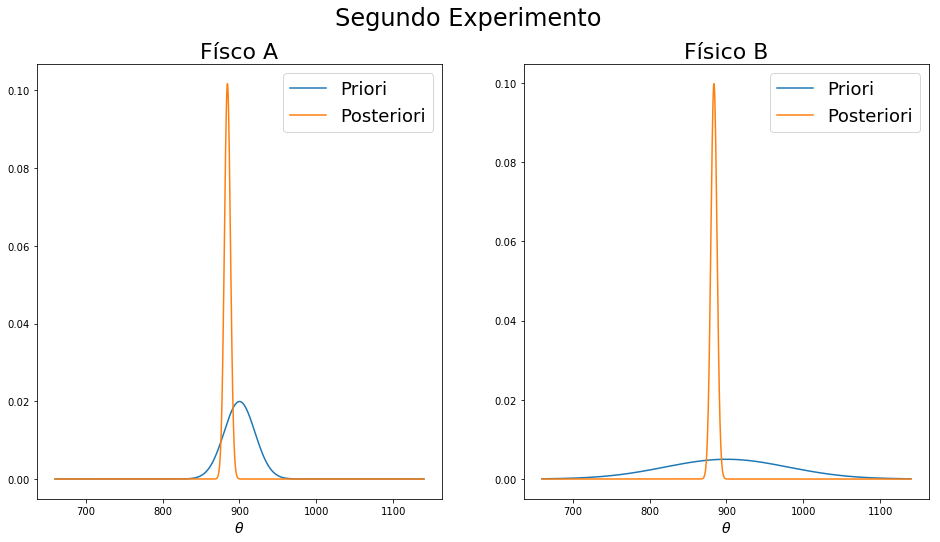

In [320]:
fig, axis = plt.subplots(1, 2, figsize = (20*0.8,10*0.8))

axis[0].set_title('Físco A', fontsize = 22)

axis[0].plot(xl, curve_priori_A1, label = 'Priori')
axis[0].plot(xl, curve_posteriori_A2, label = 'Posteriori')

axis[0].set_xlabel(r'$\theta$', fontsize = 14)

axis[1].set_title('Físico B', fontsize = 22)

axis[1].plot(xl, curve_priori_B1, label = 'Priori')
axis[1].plot(xl, curve_posteriori_B2, label = 'Posteriori')

axis[1].set_xlabel(r'$\theta$', fontsize = 14)

axis[0].legend(fontsize = 18)
axis[1].legend(fontsize = 18)

fig.suptitle(r'Segundo Experimento', fontsize = 24)

plt.savefig(f"atv_II_3", dpi=150)

In [321]:
print('Physicit A Experiment 2\nPosterior Resume:\n')
normal_resume(mean_pos_A2, var_pos_A2)

Physicit A Experiment 2
Posterior Resume:

-Mean: 884.31
-Mode: 884.31
-Median: 884.31
-Variance: 15.38
-Credible Interval: [876.63, 892.00]


In [322]:
print('Physicit B Experiment 2\nPosterior Resume:\n')

normal_resume(mean_pos_B2, var_pos_B2)

Physicit B Experiment 2
Posterior Resume:

-Mean: 883.73
-Mode: 883.73
-Median: 883.73
-Variance: 15.96
-Credible Interval: [875.90, 891.56]


In [330]:
x = np.linspace(guess_B[0] - guess_B[1]*9, guess_B[0] + guess_B[1]*9, 1000)

In [333]:
predi_A = normal_distribution(x, guess_A[0], guess_A[1]+40)
predi_B = normal_distribution(x, guess_B[0], guess_B[1]+40)

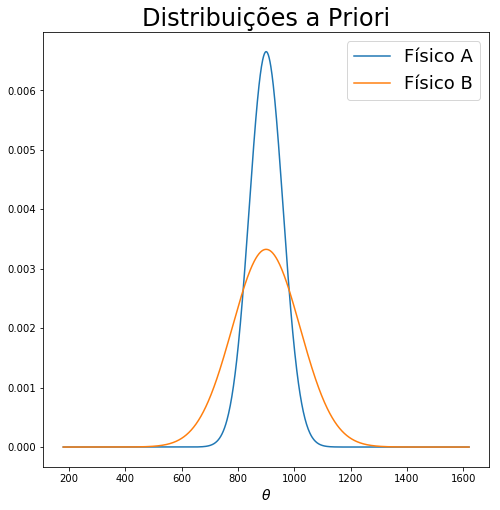

In [334]:
fig = plt.figure(figsize = (8,8))

plt.title('Distribuições a Priori', fontsize = 24)

plt.plot(x, priori_A, label = 'Físico A')
plt.plot(x, priori_B, label = 'Físico B')

plt.xlabel(r'$\theta$', fontsize = 14)

plt.legend(fontsize = 18)

plt.savefig(f"atv_II_1", dpi=150)

In [432]:
predi_A1 = lambda x: np.exp(-1/2*(x**2/40**2 ))

In [433]:
x = np.linspace(guess_B[0] - guess_B[1]*0.1, guess_B[0] + guess_B[1]*0.1, 1000)

In [434]:
p = predi_A1(x)

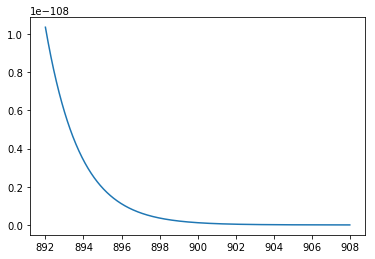

In [435]:
plt.plot(x, p)

In [436]:
predi_A1(1000)

1.918555668934785e-136